<a href="https://colab.research.google.com/github/Syamkrishna123/Fault_detection_and_prediction_of_water_pump/blob/main/pump_sensor_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TABLE OF CONTENTS**

1.   Importing necessary Libraries
2.   Data Understanding and EDA

> 2.1 Checking for data types

> 2.2 Check for number of rows and columns

> 2.3 Checking for any null values

> 2.4 Dropping Null values

> 2.5 Data Info

> 2.6 Describing the dataset

> 2.7 Dropping Unwanted columns

> 2.8 Count plot for target column

> 2.9 Mean-Time plot for sensor data

> 2.10 Correlation Heatmap

> 2.11 Mean plot for sensor readings each state of the pump

> 2.12 Bar plot for missing values

> 2.13 Histogram for distribution

> 2.14 Scatter plot for motor current vs motor speed


## **1. IMPORTING NECESSARY LIBRARIES**

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msnum 

**READING THE DATASET**

In [33]:
from google.colab import drive
drive.mount('/content/drive')

data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/sensor.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. DATA UNDERSTANDING AND EDA**

In [5]:
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [6]:
data.tail()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
220315,220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,...,38.28125,68.28703,52.37268,48.32176,41.087960,212.3843,153.6458,NaN,231.1921,NORMAL
220316,220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,...,38.28125,66.84028,50.63657,48.03241,40.798610,213.8310,156.2500,NaN,231.1921,NORMAL
220317,220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,...,39.06250,65.39352,48.90046,48.03241,40.798610,217.3032,155.3819,NaN,232.0602,NORMAL
220318,220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,...,40.62500,64.23611,47.74306,48.32176,40.509258,222.5116,153.9352,NaN,234.0856,NORMAL
220319,220319,2018-08-31 23:59:00,2.396528,47.69965,50.520832,43.142361,639.814800,65.45634,15.11863,16.65220,...,41.40625,62.78935,46.29630,48.90046,40.219910,227.4306,150.4630,NaN,234.0856,NORMAL


**2.1 CHECKING FOR DATA TYPES**

In [7]:
data.dtypes

Unnamed: 0          int64
timestamp          object
sensor_00         float64
sensor_01         float64
sensor_02         float64
sensor_03         float64
sensor_04         float64
sensor_05         float64
sensor_06         float64
sensor_07         float64
sensor_08         float64
sensor_09         float64
sensor_10         float64
sensor_11         float64
sensor_12         float64
sensor_13         float64
sensor_14         float64
sensor_15         float64
sensor_16         float64
sensor_17         float64
sensor_18         float64
sensor_19         float64
sensor_20         float64
sensor_21         float64
sensor_22         float64
sensor_23         float64
sensor_24         float64
sensor_25         float64
sensor_26         float64
sensor_27         float64
sensor_28         float64
sensor_29         float64
sensor_30         float64
sensor_31         float64
sensor_32         float64
sensor_33         float64
sensor_34         float64
sensor_35         float64
sensor_36   

**2.2 CHECK FOR NUMBER OF ROWS AND COLUMNS**

In [8]:
rows, columns=data.shape
print('There are {} rows and {} columns'.format(rows,columns))

There are 220320 rows and 55 columns


**2.3 CHECKING FOR ANY NULL VALUES**

In [9]:
data.isna().sum()

Unnamed: 0             0
timestamp              0
sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16


Columns with more than 10000 NaN values can be dropped

**2.4 DROPPING NULL VALUES**

In [36]:
data.drop(['sensor_00','sensor_15','sensor_50','sensor_51'],axis=1, inplace= True)

In [37]:
data['machine_status'].unique()

array(['NORMAL', 'BROKEN', 'RECOVERING'], dtype=object)

In [12]:
data['machine_status'].value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

**2.5 DATA INFO**

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 51 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  sensor_16       220289 non-null  float64
 17  sensor_17 

In [15]:
print(data['timestamp'])

0         2018-04-01 00:00:00
1         2018-04-01 00:01:00
2         2018-04-01 00:02:00
3         2018-04-01 00:03:00
4         2018-04-01 00:04:00
                 ...         
220315    2018-08-31 23:55:00
220316    2018-08-31 23:56:00
220317    2018-08-31 23:57:00
220318    2018-08-31 23:58:00
220319    2018-08-31 23:59:00
Name: timestamp, Length: 220320, dtype: object


  Sensor data of 5 months from April to August is provided. 

   Each row contains sensor readings after one minute.

**2.6 DESCRIBING THE DATASET**

In [16]:
data.describe()

,Unnamed: 0,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49
count,220320.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,215725.000000,...,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000
mean,110159.500000,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,14.799210,...,68.844530,35.365126,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968
std,63601.049991,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,2.091963,...,21.371139,7.898665,10.259521,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598
min,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,0.000000,...,23.437500,20.833330,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370
25%,55079.750000,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,15.053530,...,57.812500,32.552080,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060
50%,110159.500000,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,15.082470,...,66.406250,34.895832,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040
75%,165239.250000,49.479160,52.777770,45.312500,637.615723,80.912150,14.539930,16.427950,15.697340,15.118630,...,77.864580,37.760410,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890
max,220319.000000,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,25.000000,...,512.760400,420.312500,374.218800,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700


**2.7 DROPPING UNWANTED COLUMNS**

Dataset contains unwanted column called 'Unnamed: 0' which is do not needed in further processing. So we are going to drop that column

In [17]:
data.drop('Unnamed: 0', axis= 1, inplace= True)

MACHINE STATUS DISTRIBUTION

In [18]:
data['machine_status'].value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

**2.8 COUNT PLOT FOR TARGET COLUMN**

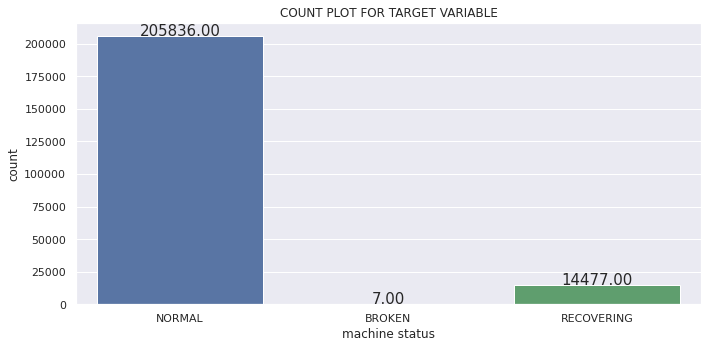

In [34]:
plt.rcParams["figure.figsize"]= [10,5]
ax= sns.countplot(x= 'machine_status',data= data)
for x in ax.patches:
  ax.annotate(format(x.get_height(), '.2f'), (x.get_x()+x.get_width()/2, x.get_height()),ha= 'center', va='center',size=15, xytext=(0,5),textcoords='offset points')
plt.title('COUNT PLOT FOR TARGET VARIABLE')
plt.xlabel('machine status')
plt.show()

Data contains 3 classes namely Normal, Recovering and Broken.

Normal contains 205836 data points,

Recovering contains 14477 data points,

and Broken contains 7 data points.

RESAMPLE TIMESTAMP AS A DATA

In [21]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
df1 = data.set_index('timestamp') 
da = df1.resample(rule='D').mean()

**2.9 MEAN-TIME PLOT FOR SENSOR DATA**

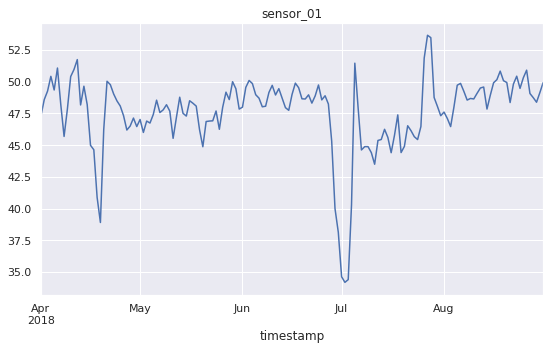

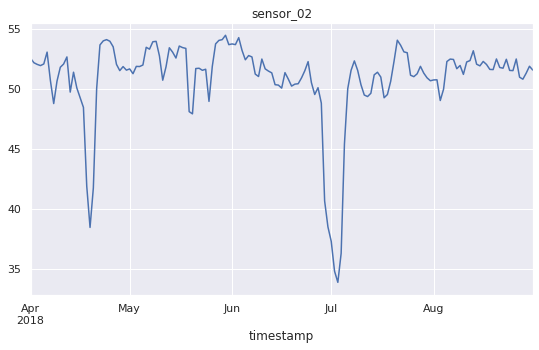

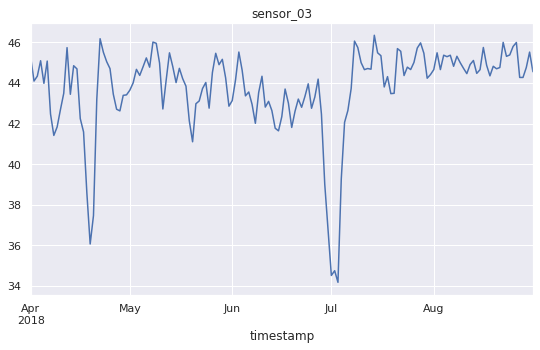

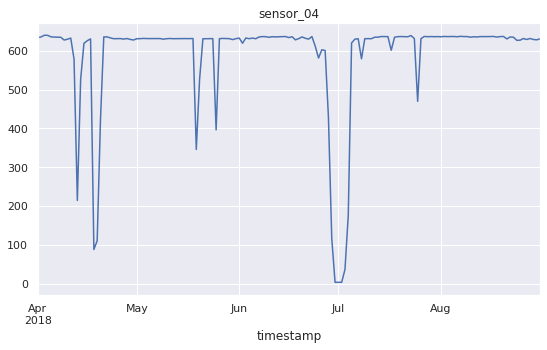

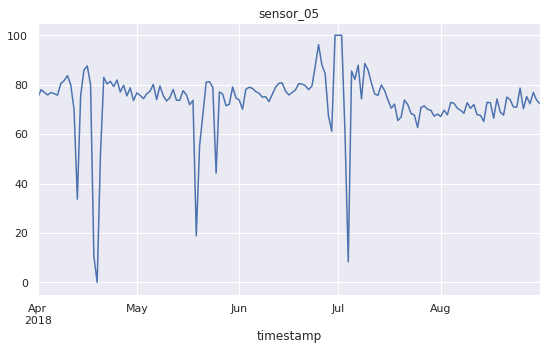

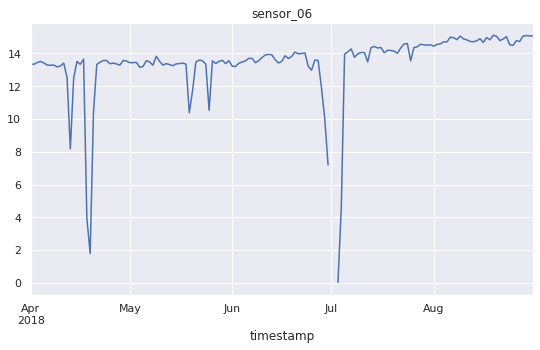

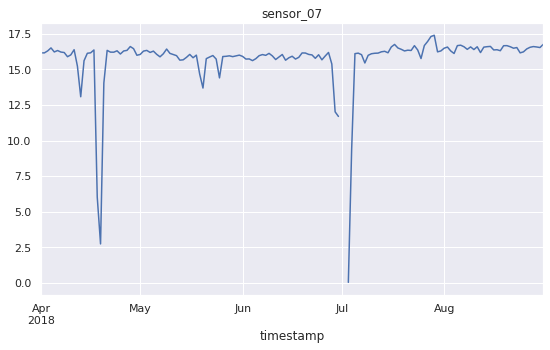

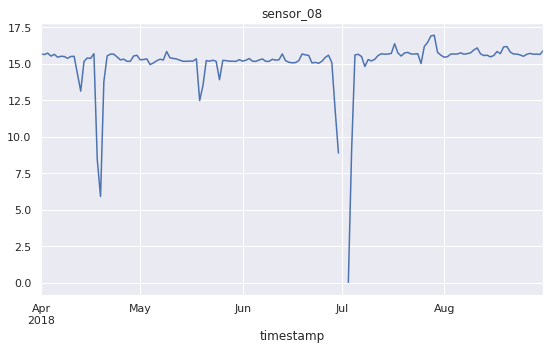

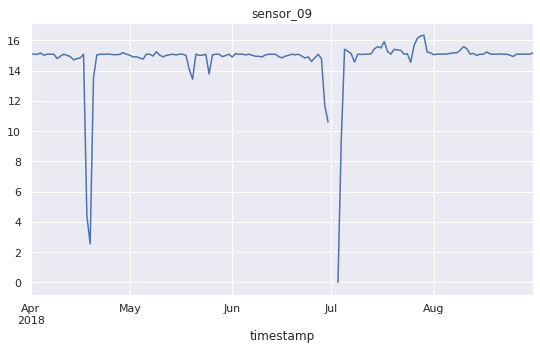

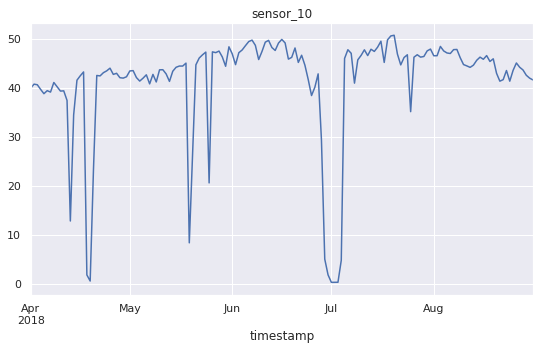

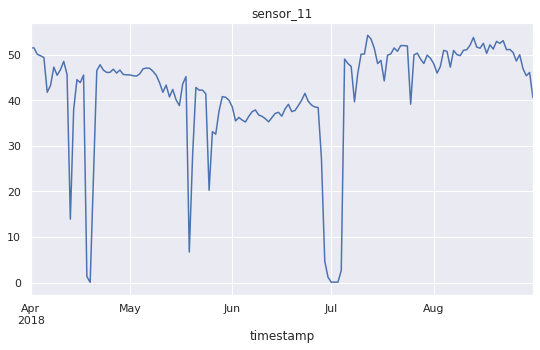

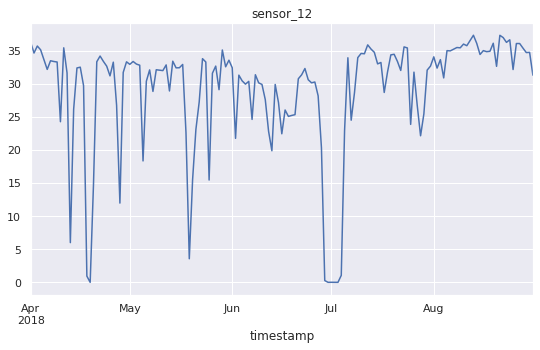

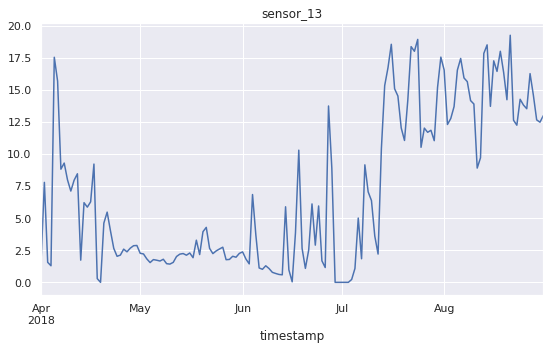

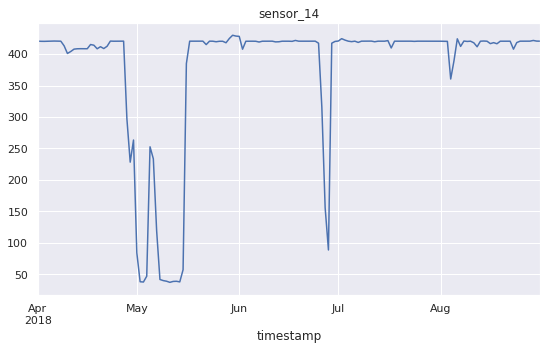

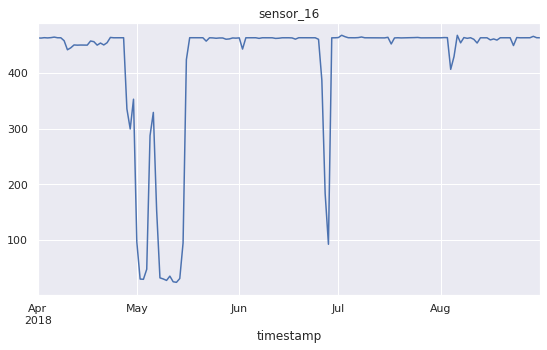

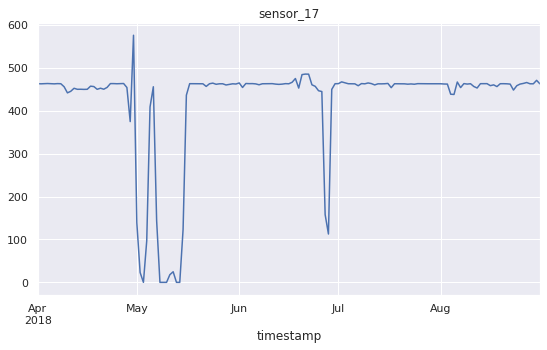

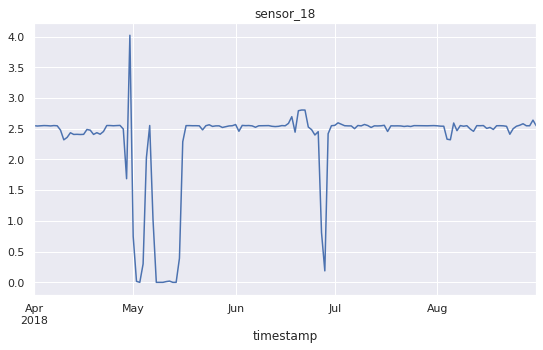

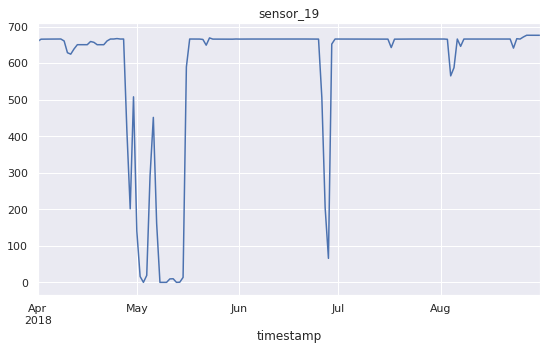

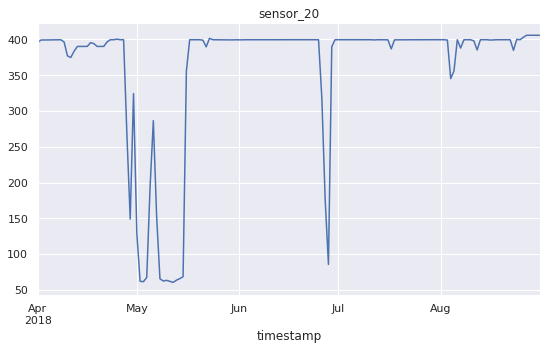

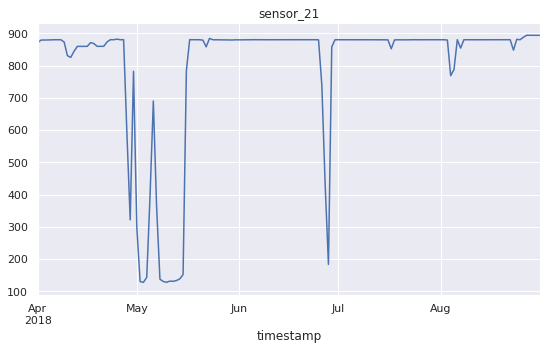

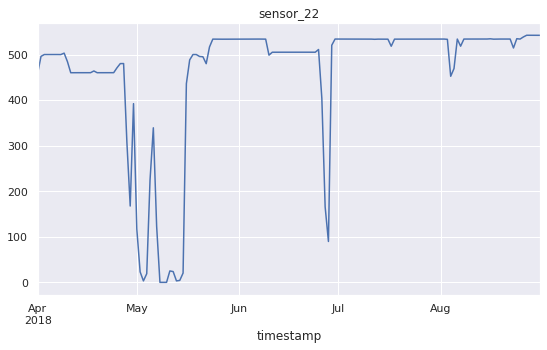

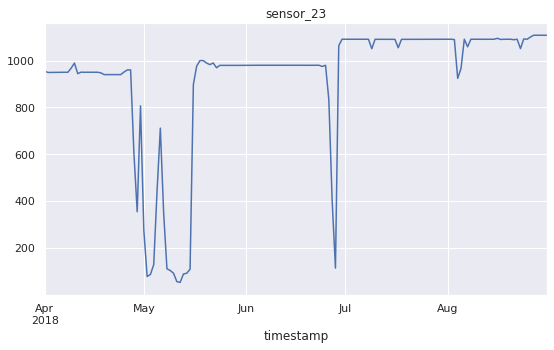

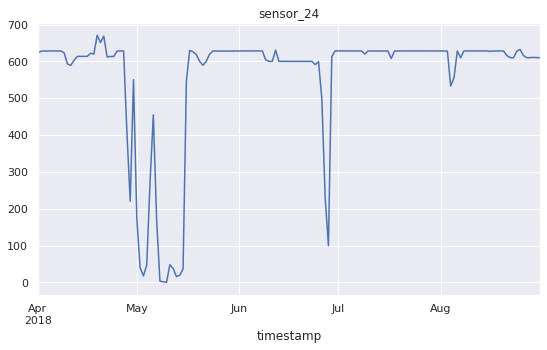

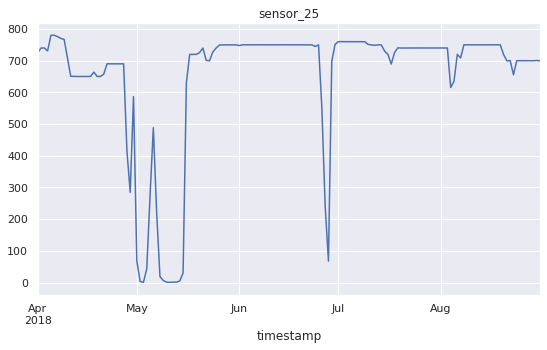

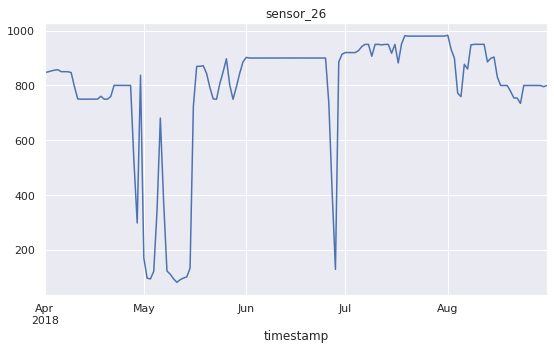

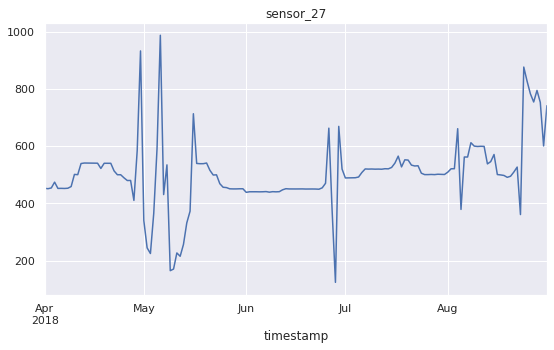

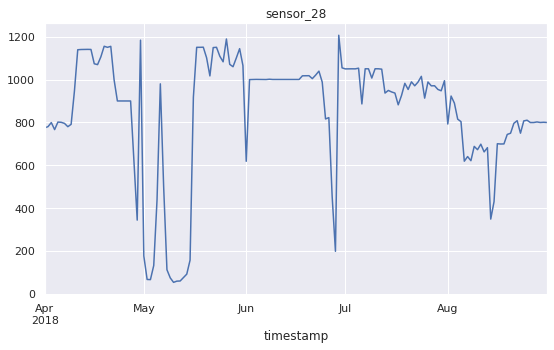

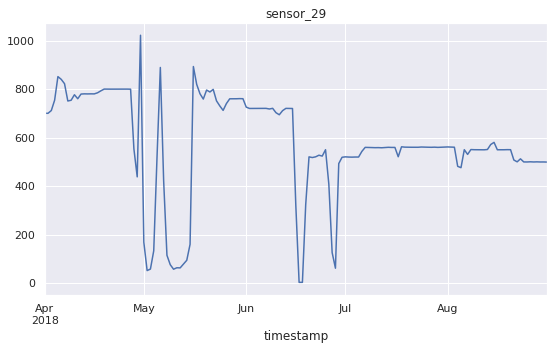

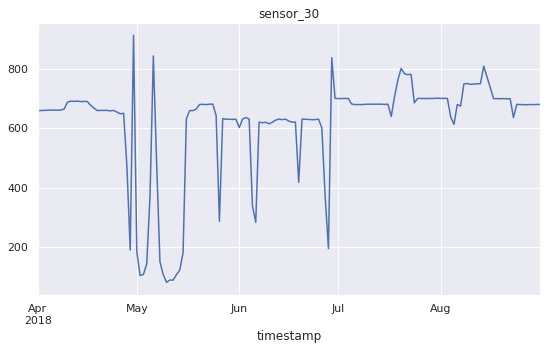

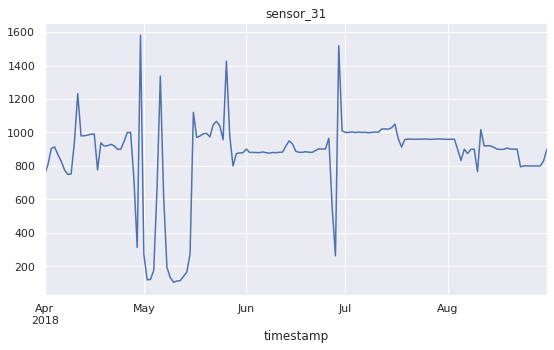

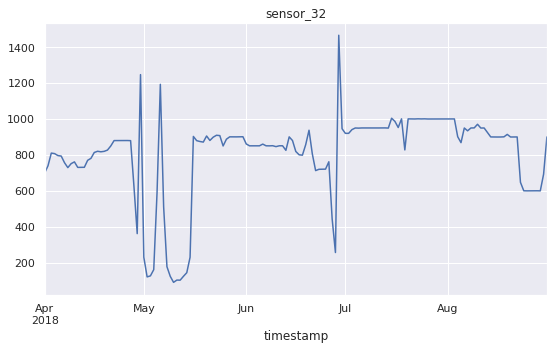

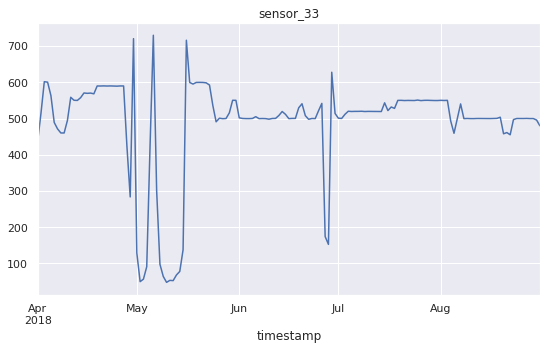

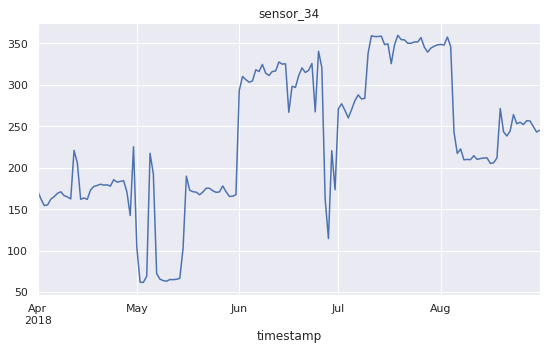

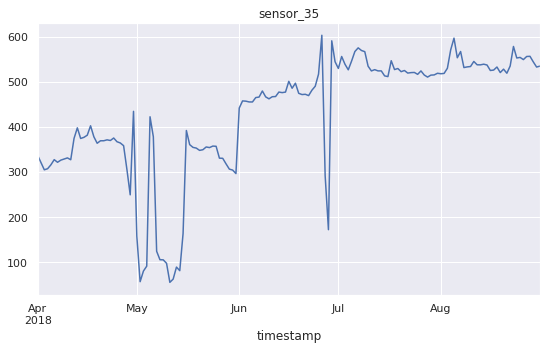

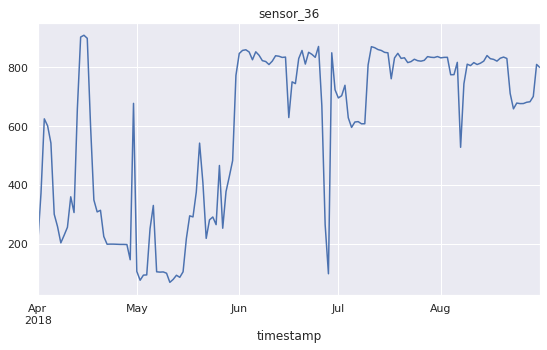

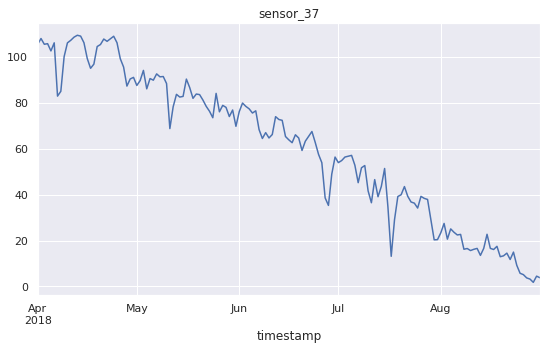

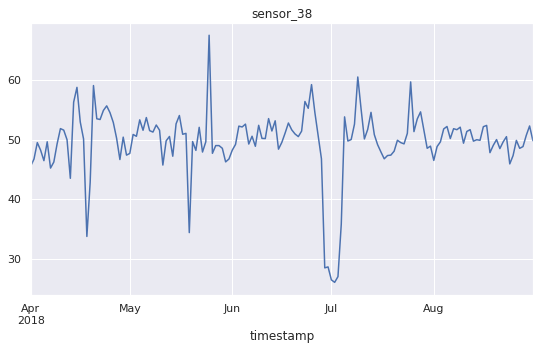

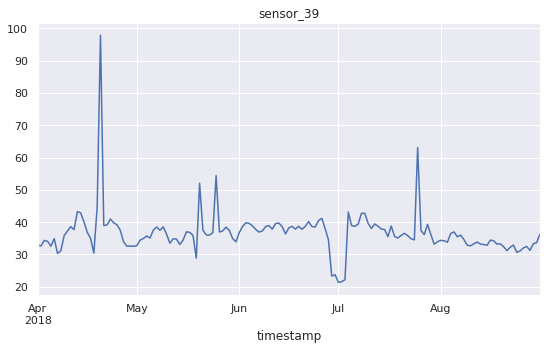

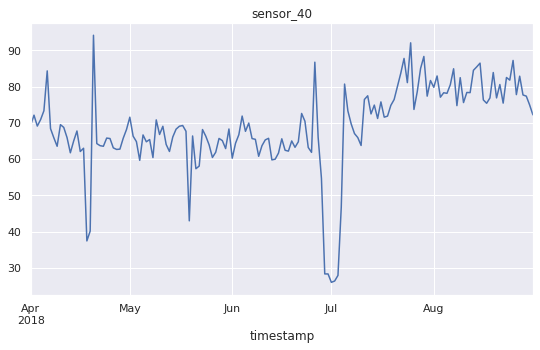

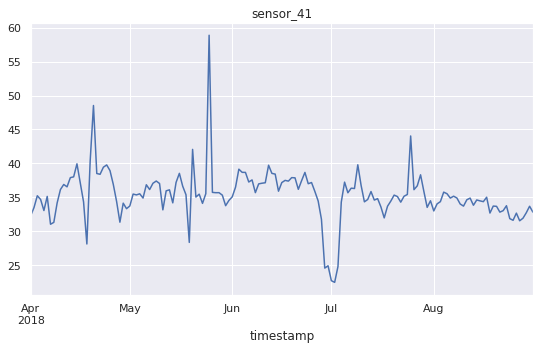

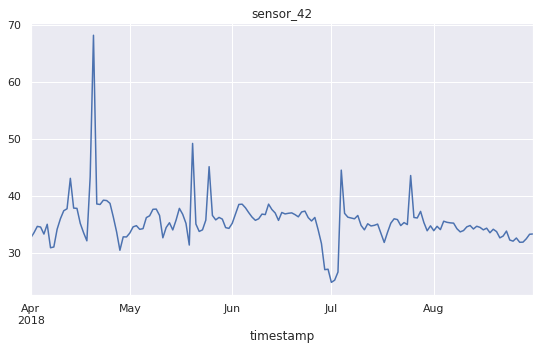

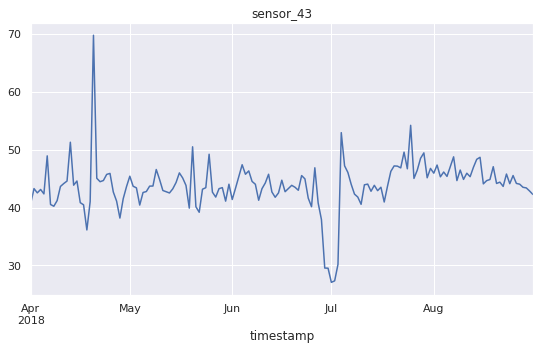

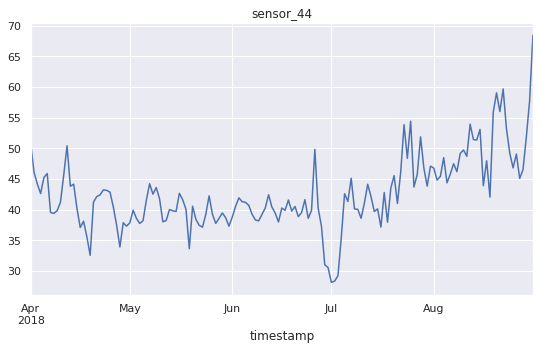

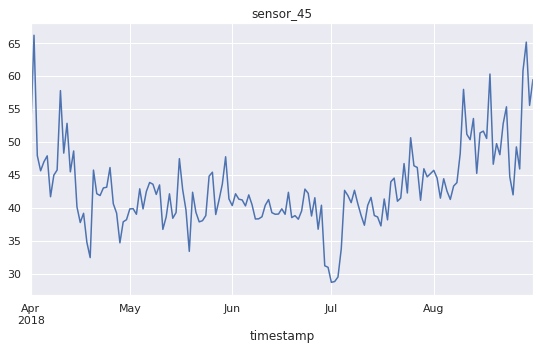

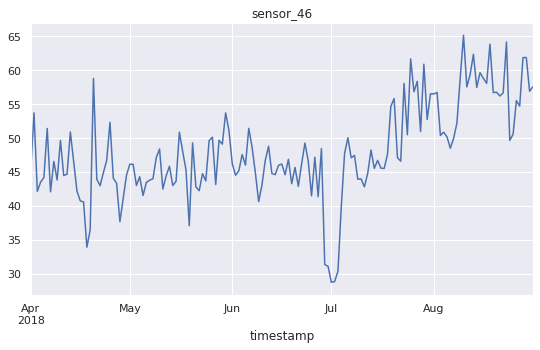

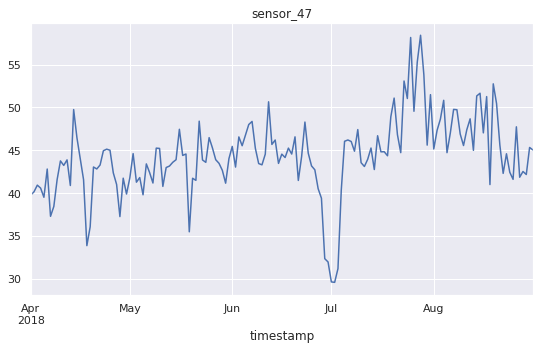

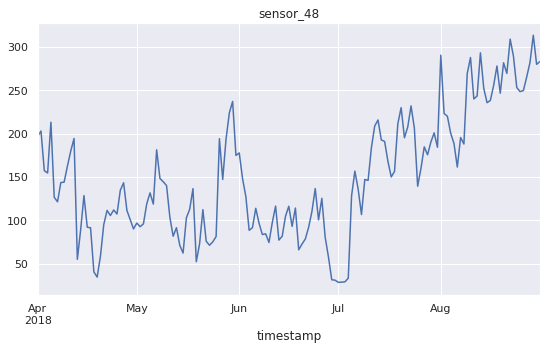

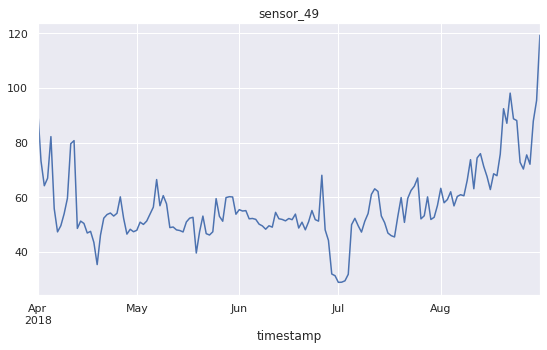

In [22]:
df2 = df1.drop(['machine_status'], axis=1)
names=df2.columns
import warnings
for name in names:
    warnings.filterwarnings("ignore")
    sns.set()
    _ = plt.figure(figsize=(9,5))
    _ = da[name].plot()
    _ = plt.title(name)

**2.10 CORRELATION HEATMAP**

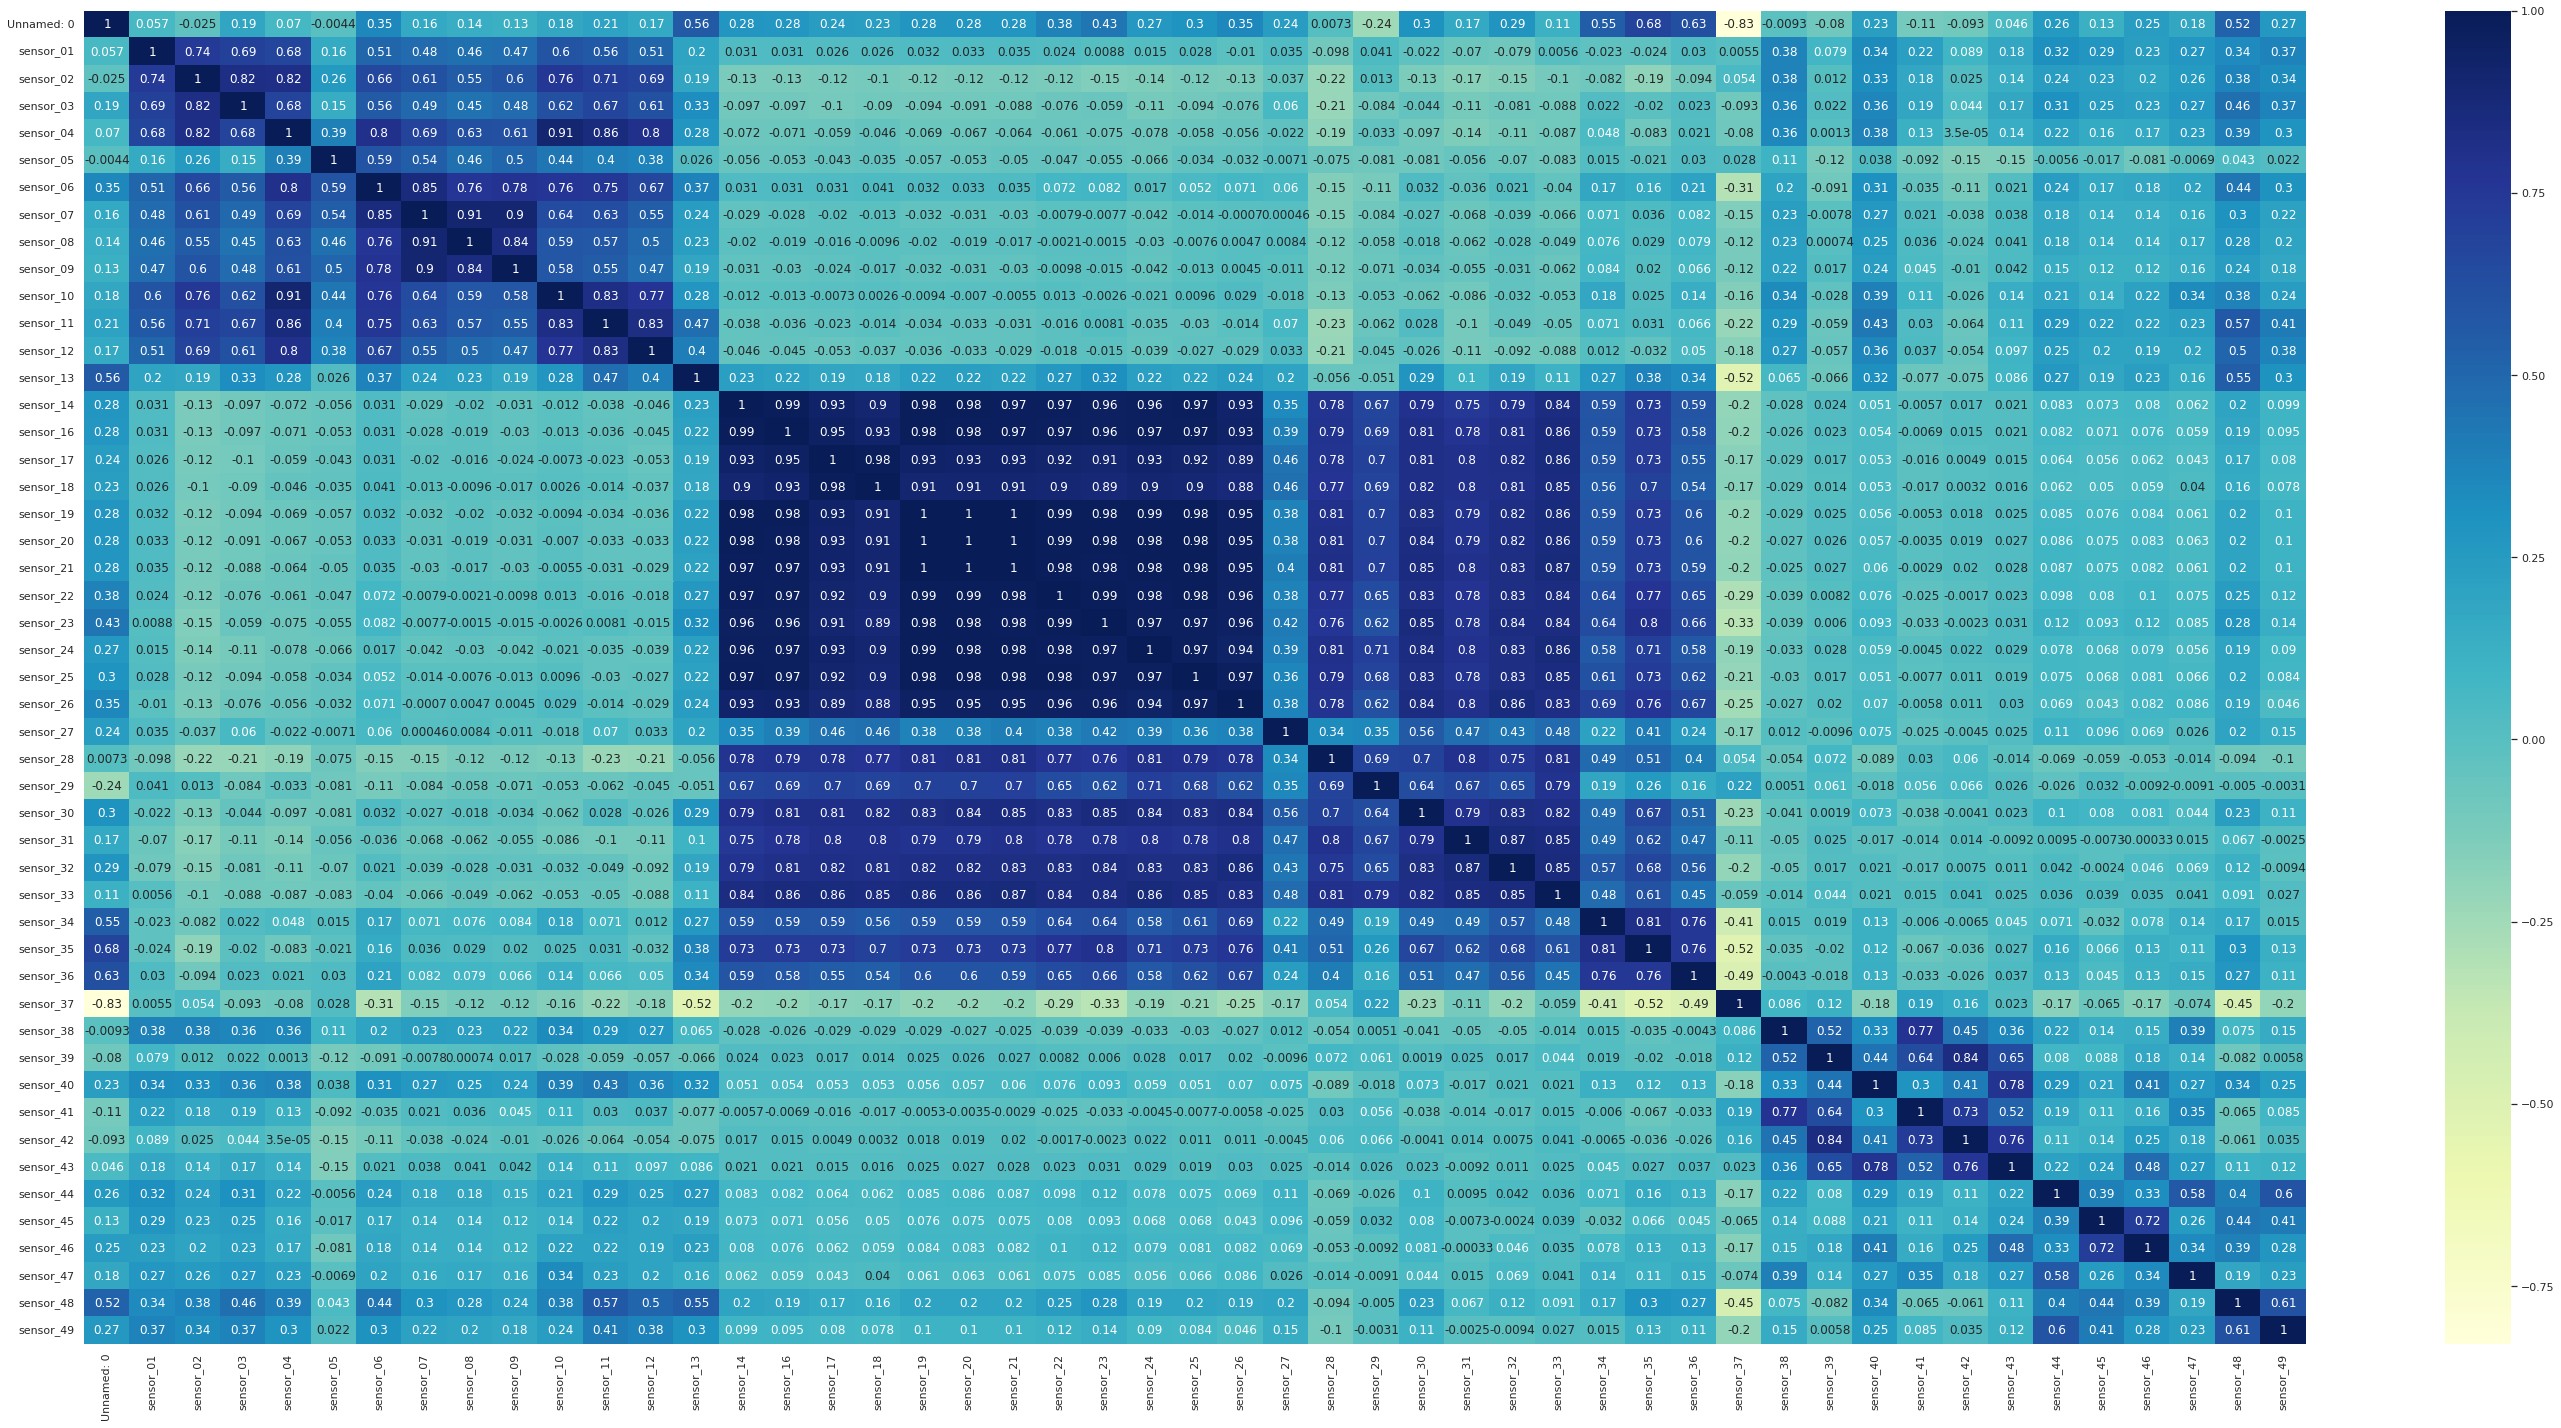

In [38]:
plt.figure(figsize=(40,20))
sns.heatmap(data.corr(),cmap="YlGnBu",annot= True)
plt.show()

From the correlation heatmap we can see almost every sensor reading is highly correlated to each other

In [26]:
normal = data[data['machine_status']=='NORMAL']
broken = data[data['machine_status']=='BROKEN']
recovering =data[data['machine_status']=='RECOVERING']

EXTRACT MEAN VALUES OF THE SENSOR READING FROM THE PUMP IN ALL THE STATES

In [27]:
means_normal=normal.mean(axis=0)
means_broken = broken.mean(axis=0)
means_recovering = recovering.mean(axis=0)

**2.11 MEAN PLOT FOR SENSOR READING EACH STATE OF THE PUMP**

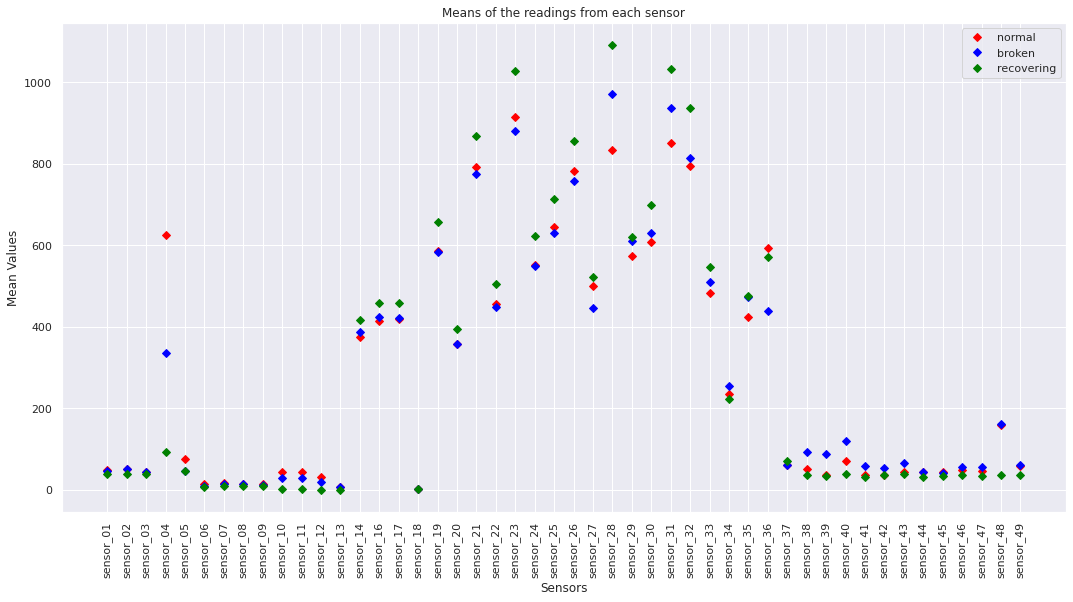

In [28]:
plt.figure(figsize=(18,9))
plt.plot(means_normal, marker='D', color='red', label='normal', linestyle='none')
plt.plot(means_broken, marker='D', color='blue', label='broken', linestyle='none')
plt.plot(means_recovering, marker='D', color='green', label='recovering', linestyle='none')
plt.xlabel('Sensors')
plt.ylabel('Mean Values')
plt.title('Means of the readings from each sensor')
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

some sensors have great difference in the means among each state

  sensor_04,sensor_28,sensor_31 have great differences

**2.12 BARPLOT FOR MISSING VALUES**

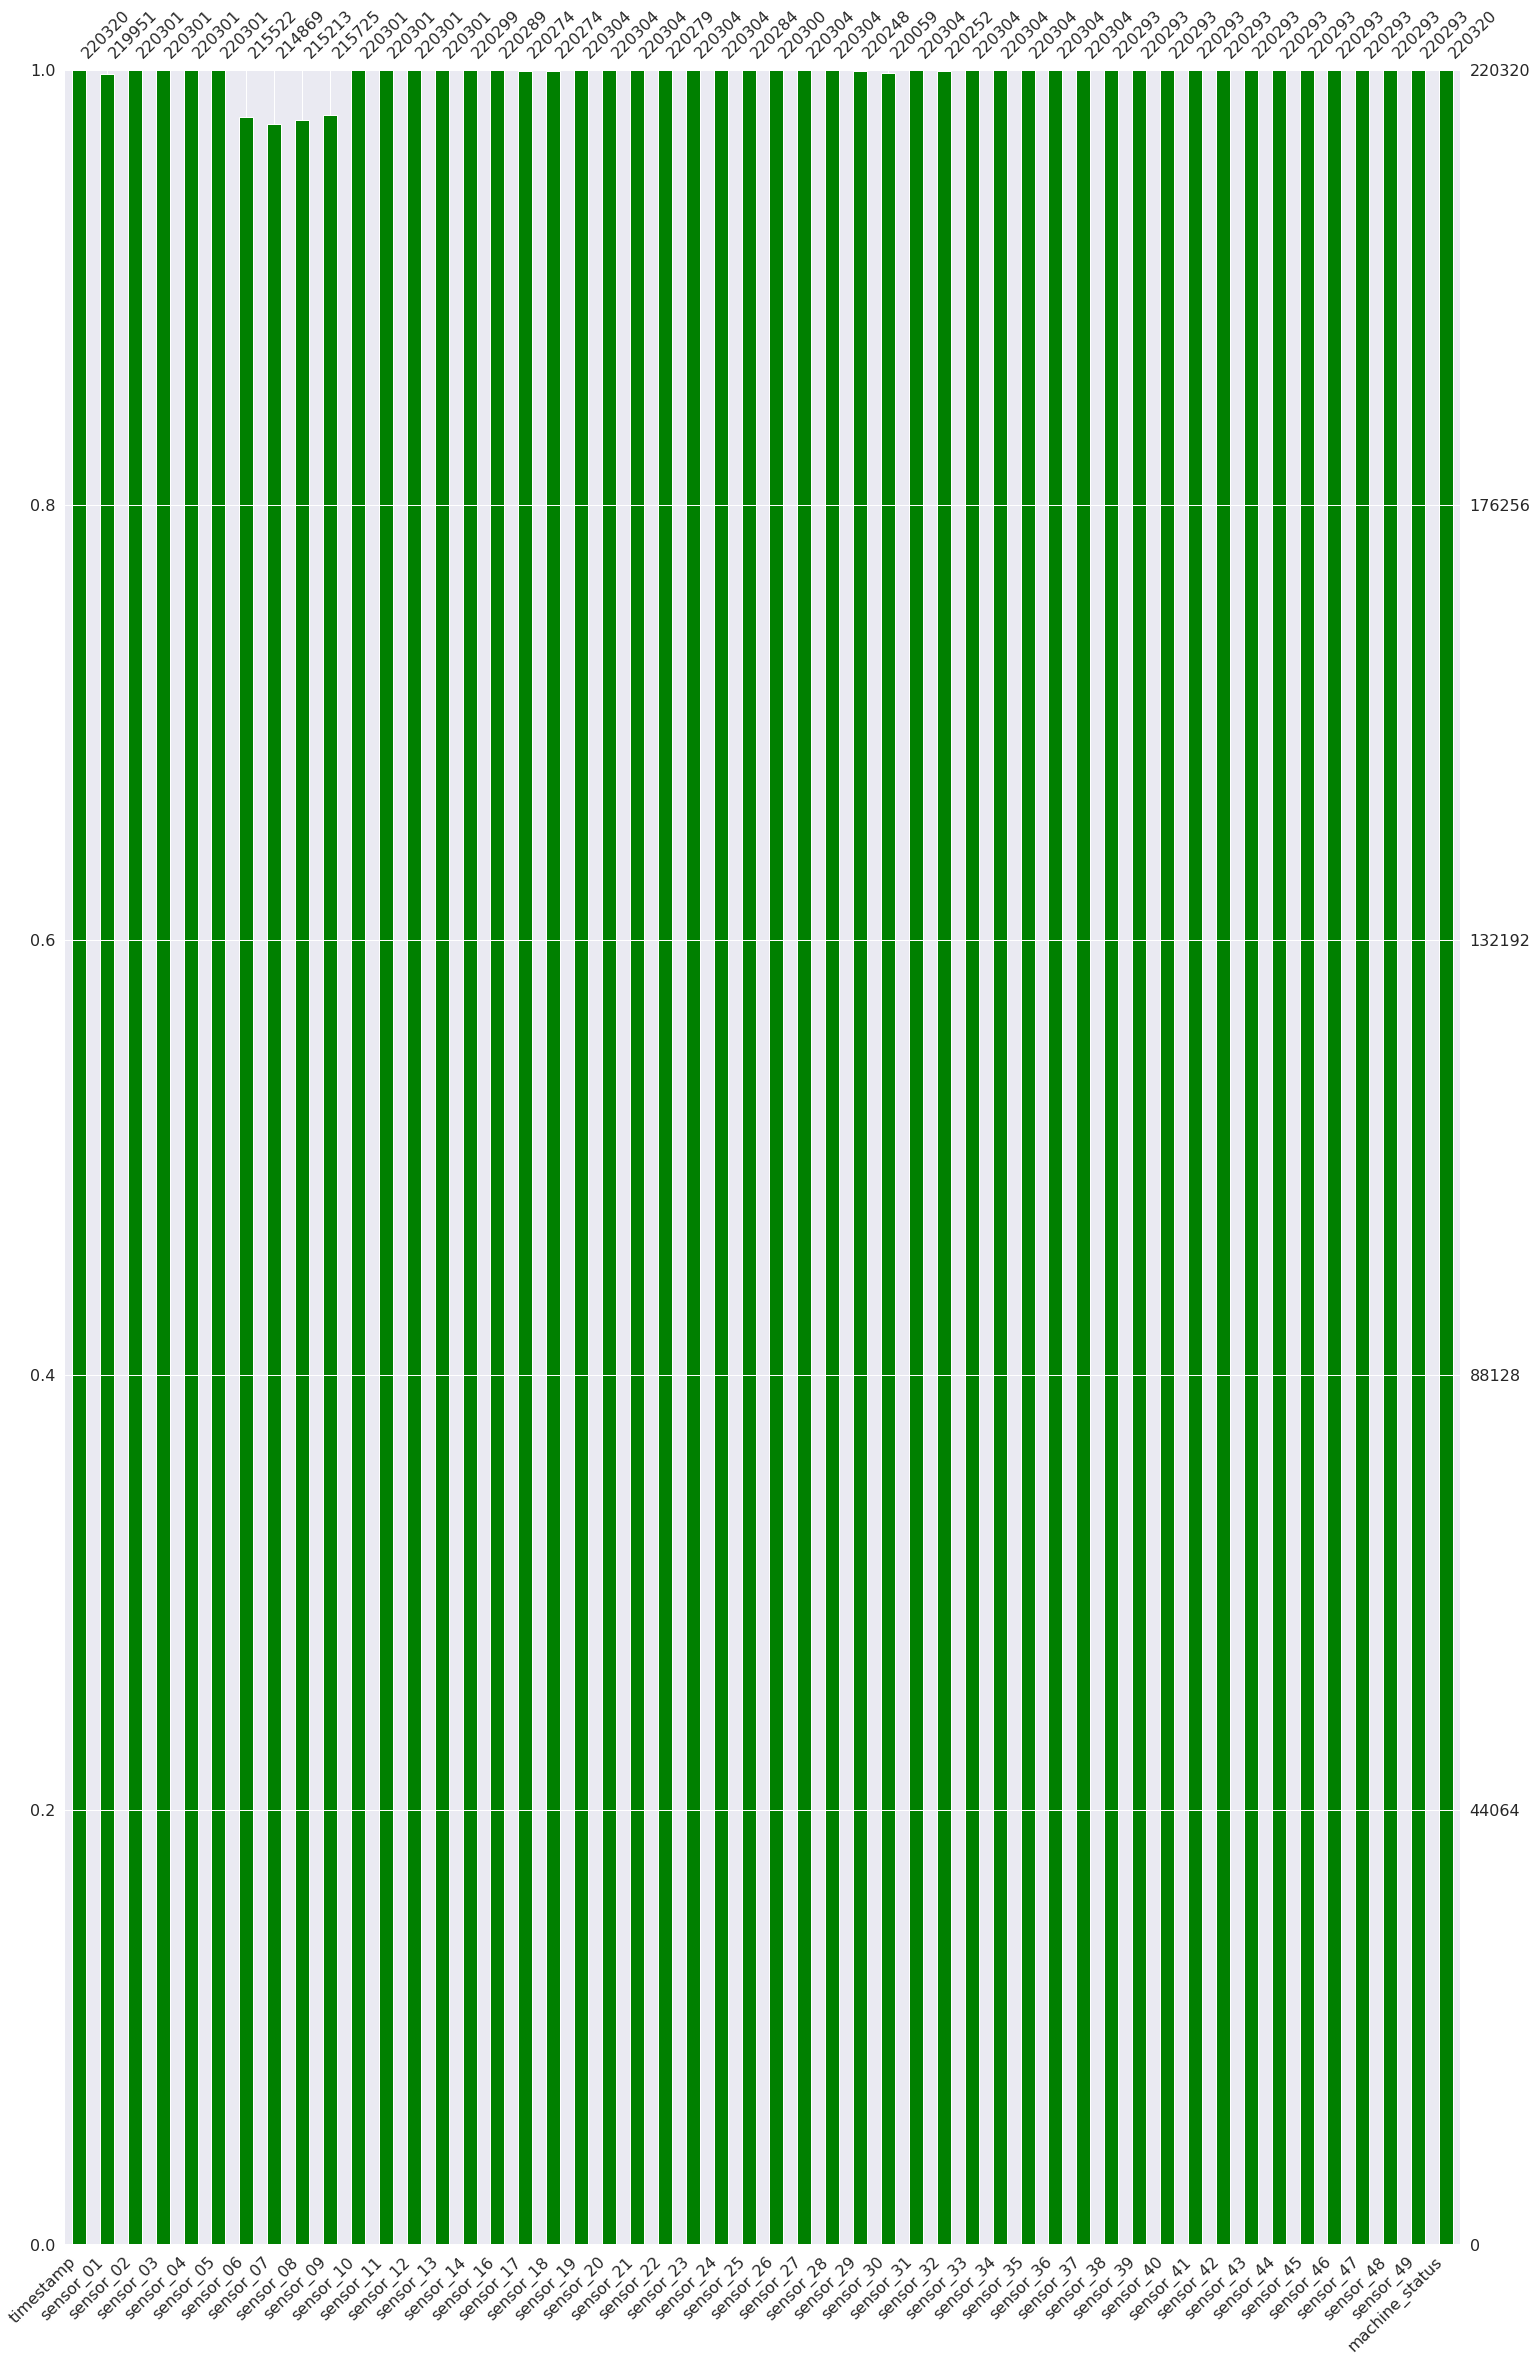

In [30]:
msnum.bar(data,color='green',figsize=(25,40))

**2.13 HISTOGRAM FOR DISTRIBUTION**

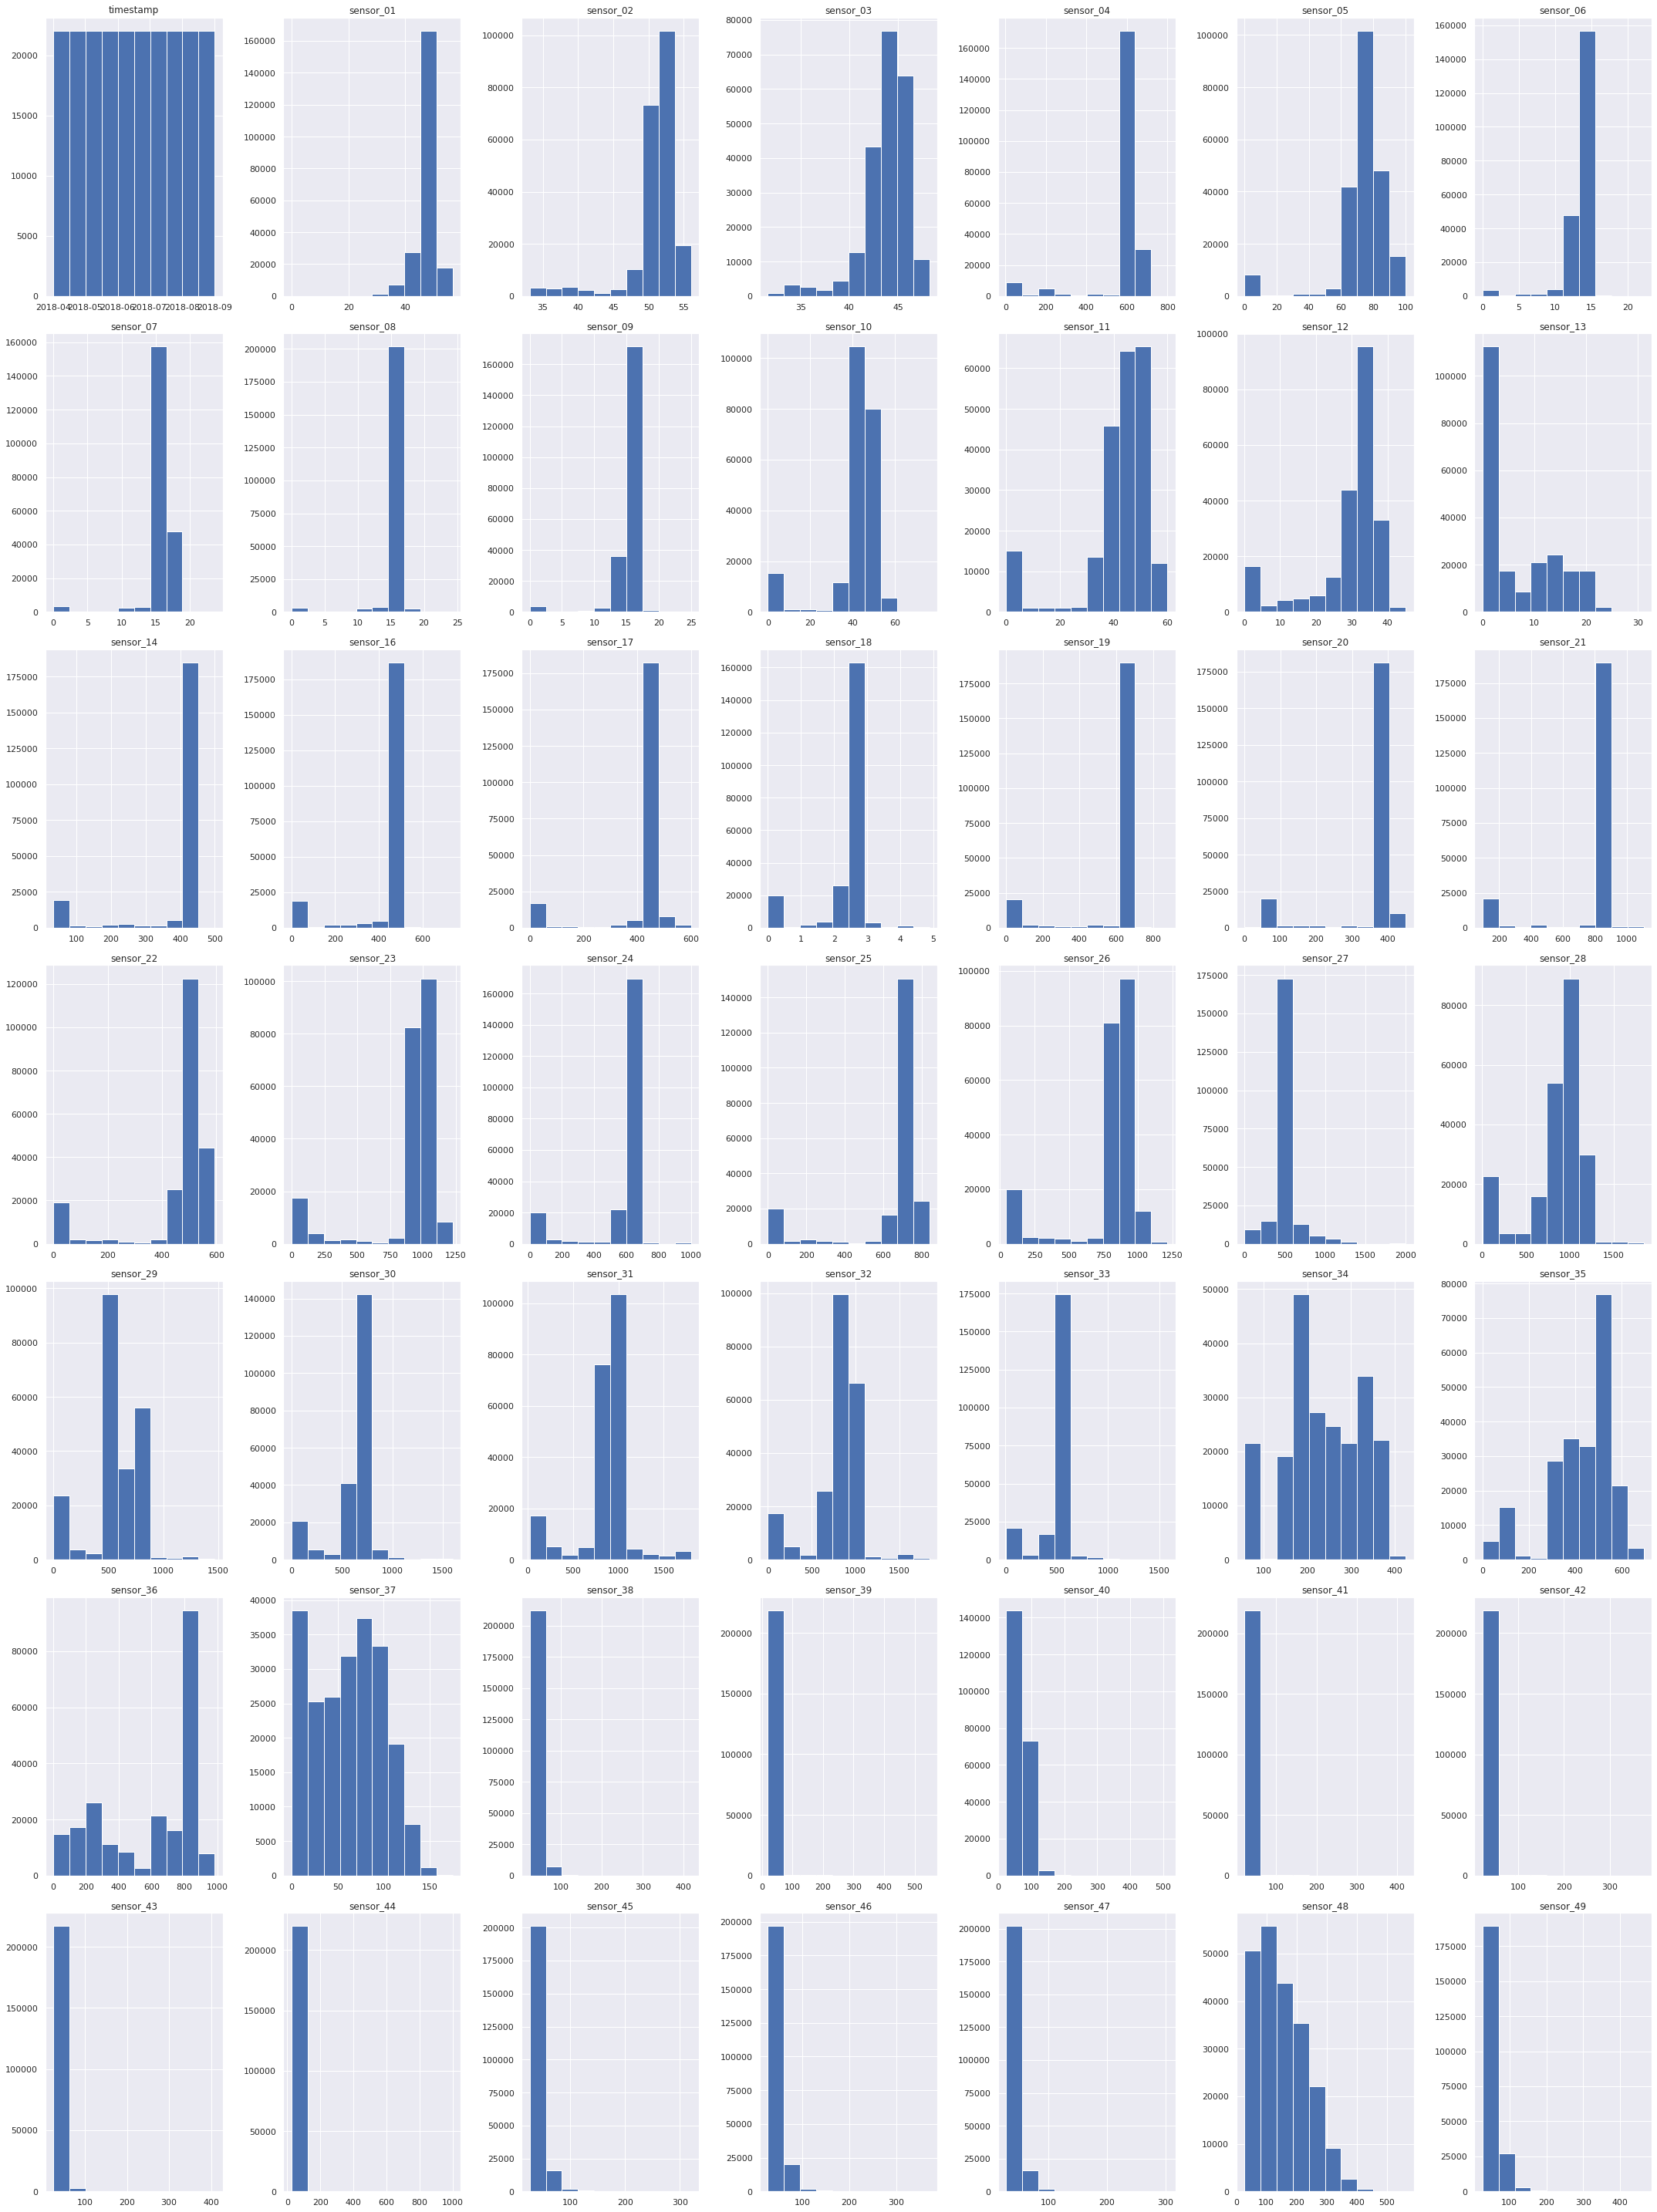

In [31]:
plt.rcParams["figure.figsize"] = [30, 40]
plt.rcParams["figure.autolayout"] = True
data.hist()
plt.show()

**2.14 SCATTER PLOT FOR MOTOR CURRENT VS MOTOR SPEED**

Text(0, 0.5, 'Sensor values for Motor Speed')

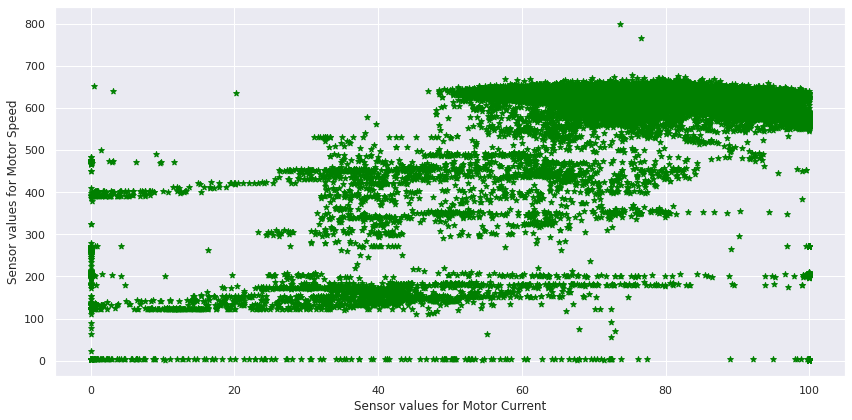

In [32]:
plt.figure(figsize=(12,6))
plt.scatter(x=data['sensor_05'],y=data['sensor_04'],marker='*',color='green')
plt.xlabel("Sensor values for Motor Current")
plt.ylabel("Sensor values for Motor Speed")

Value of motor current is increased the value for motor speed also increases. And also most of the values for motor speed is in the range 500-700